# Image Recognition

(live long, prosper, and watch out for cats)

![cat detectors rule](assets/image/meme.jpg)

(image: https://towardsdatascience.com/the-whos-who-of-machine-learning-and-why-you-should-know-them-9cefbbc84f07)

# Topics

- Input Representation
- Convolutional Neural Networks
 - Convolution, Activation, Pooling
- Architectures
 - Image Classification
 - Object Detection

# Image Recognition Tasks
![cat detectors](assets/image/cat_detectors.png)

(image: analyticsindiamag.com)

## Image Representation: Tensor

- 3 channels: 'rgb'
- rows: image height
- columns: image width

Ordering:
- Channels-first: channel, rows, columns
- Channels-last: rows, columns, channels

## Walkthrough - Image Tensors

In this walkthrough, we will read an image from file and examine the data.

### Setup

Install the Python image library from your conda environment:
```
conda install pillow
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# read an image file
demo = Image.open('assets/image/cat1.jpg') # source: pxhere.com/en/photo/1337399

# check whether this is RGB or BGR
# so that we can input the images correctly to our neural network
print('channel ordering:', demo.mode)

# display the image
plt.imshow(demo)
plt.title('moar food')
plt.show()

channel ordering: RGB


<Figure size 640x480 with 1 Axes>

In [2]:
# examine the numpy array
demo_arr = np.array(demo)

print('shape:', demo_arr.shape)
print('data type:', demo_arr.dtype)
print('rank:', demo_arr.ndim)

shape: (585, 960, 3)
data type: uint8
rank: 3


In [3]:
# since the sides of the picture are the same boring color
# inspect the (roughly) middle 5 rows and columns
midpoint_row = int(demo_arr.shape[0] / 2)
midpoint_col = int(demo_arr.shape[1] / 2)

demo_arr[midpoint_row:midpoint_row+5, midpoint_col:midpoint_col+5, :]

array([[[111, 120,  15],
        [103, 112,   7],
        [100, 109,   4],
        [103, 110,   6],
        [102, 109,   5]],

       [[105, 114,   9],
        [101, 110,   5],
        [103, 112,   7],
        [107, 114,  10],
        [107, 114,  11]],

       [[107, 115,  12],
        [103, 111,   8],
        [102, 110,   7],
        [102, 109,   6],
        [102, 109,   6]],

       [[106, 114,  11],
        [106, 114,  11],
        [107, 115,  12],
        [107, 114,  11],
        [105, 112,   9]],

       [[106, 114,  11],
        [106, 114,  11],
        [106, 114,  11],
        [106, 113,  10],
        [106, 113,  10]]], dtype=uint8)

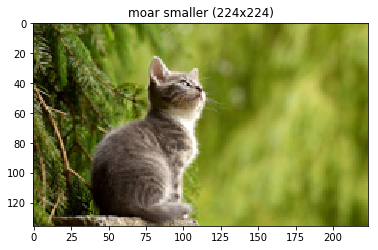

In [4]:
# resize the image to 224 by 224
demo.thumbnail((224, 224), resample=Image.BICUBIC)

# display the image
plt.imshow(demo, interpolation='nearest')
plt.title('moar smaller (224x224)')
plt.show()

In [5]:
# examine the numpy array again
demo_arr = np.array(demo)

print(demo_arr.shape)
print(demo_arr.dtype)

# notice the difference in values from previously
midpoint_row = int(demo_arr.shape[0] / 2)
midpoint_col = int(demo_arr.shape[1] / 2)
demo_arr[midpoint_row:midpoint_row+5, midpoint_col:midpoint_col+5, :]

(136, 224, 3)
uint8


array([[[104, 113,   8],
        [106, 113,  10],
        [106, 113,  10],
        [111, 119,  16],
        [116, 126,  21]],

       [[108, 116,  13],
        [108, 114,  11],
        [109, 116,  13],
        [112, 121,  17],
        [116, 127,  22]],

       [[110, 118,  14],
        [109, 116,  13],
        [111, 118,  13],
        [114, 124,  18],
        [117, 129,  22]],

       [[110, 117,  14],
        [109, 117,  14],
        [112, 121,  15],
        [116, 126,  17],
        [116, 129,  21]],

       [[110, 118,  14],
        [110, 118,  16],
        [114, 124,  18],
        [116, 128,  18],
        [117, 132,  21]]], dtype=uint8)

A histogram is sometimes helpful to visualize the colour distribution of a given channel

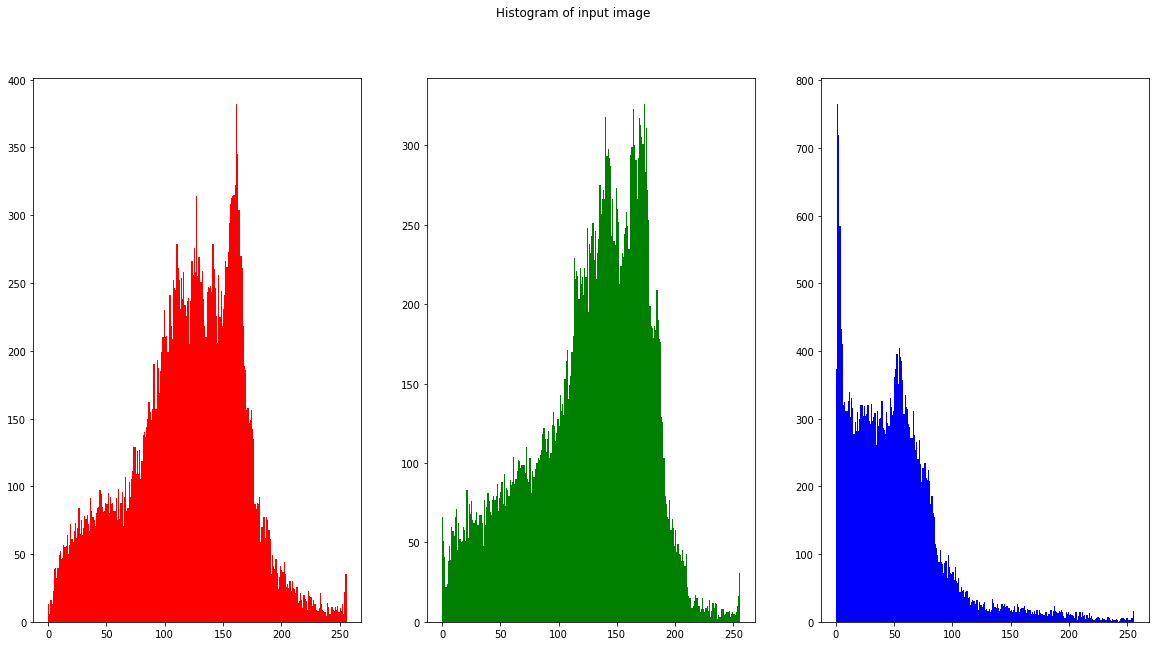

In [6]:
# order: RGB
red_channel = demo_arr[:, :, 0] #Due to RGB , red is 0, green is 1 and blue is 2
green_channel = demo_arr[:, :, 1]
blue_channel = demo_arr[:, :, 2]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

# flatten the [row_size, col_size] matrix into a vector of [row_size * col_size]
# we just need to count the raw pixel values for the histogram,
# so it doesn't matter where they are located.
ax[0].hist(red_channel.flatten(), 256, range=(0,256), color='red')
ax[1].hist(green_channel.flatten(), 256, range=(0,256), color='green')
ax[2].hist(blue_channel.flatten(), 256, range=(0,256), color='blue')

fig.suptitle('Histogram of input image')
plt.show()

## Output

- Image Classification: labels
- Object Detection: labels + bounding boxes
- Instance Segmentation: labels + boundaries

## Problem: many input features $\rightarrow$ many parameters

224 x 224 pixel colour image: 224 x 224 x 3 = 150528 features

Dimensionality reduction may help, but there's a better way....

## Convolution

- Reduces parameter space
- Looks at localized, spatial information

![cnn](assets/image/cnn.png)

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Convolution - Hyperparmeters

- Kernel size: size of the window (pixels)
- Stride: how many pixels to slide the window
- Depth: how many filters to use
- Padding: whether to keep the output size the same as input size

## Kernel size = (2, 2), Stride = 1

![convolution](assets/image/2d_convolution.png)

(image: http://www.deeplearningbook.org/contents/convnets.html)

## Depth = number of filters

![depth col](assets/image/depthcol.jpg)

(image: https://cs231n.github.io/convolutional-networks)

## Padding = same

![same_padding_no_strides](assets/image/same_padding_no_strides.gif)

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Padding = valid (none)

![no_padding_no_strides](assets/image/no_padding_no_strides.gif)

(image: [leonardoaraujosantos.gitbooks.io](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html))

## Activity - Convolution Hyperparameters

1. Run and watch the example in the next cell. 

2. Fill in the corresponding hyperparameters

 - Kernel Size = 
 - Stride = 
 - Depth = 
 - Padding =

In [7]:
# Source: https://cs231n.github.io/convolutional-networks
from IPython.display import HTML

HTML('<iframe src=conv-demo.html width=800 height=700></iframe>')

## Walkthrough - 2D Convolution

In this walkthrough, we will convolve our demo image with a kernel that performs edge detection.

Credits: http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html

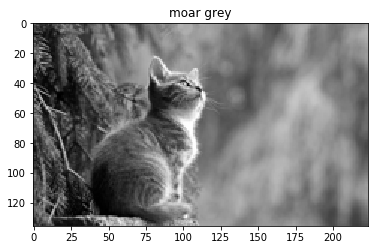

In [8]:
# convert our input image to greyscale (1 channel)
demo_grey = demo.convert(mode='L')

plt.imshow(demo_grey, interpolation='nearest')
plt.title('moar grey')
plt.show()

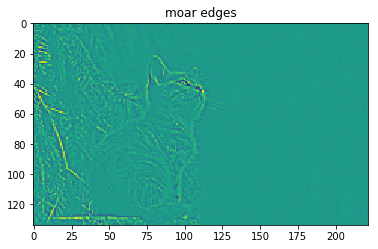

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
from scipy.signal import convolve2d

# edge-detection kernel
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

# we use 'valid' which means we do not add zero padding to our image
edges = convolve2d(demo_grey, kernel, mode='valid')

plt.imshow(edges)
plt.title('moar edges')
plt.show()

## Convolutional Block

Generally, 3 stages:
1. Convolutional Layer
2. Activation Layer
3. Pooling Layer

Sometimes 1 & 2 will repeat a few times before 3.

![conv block](assets/image/convnet.jpg)

(image: https://cs231n.github.io/convolutional-networks)

## Activation Layer

The output of convolution is typically passed through an "activation" function, so that it can model non-linearity:

Examples:
- linear (= no activation)
- sigmoid
- tanh
- Rectified Linear Units, leaky ReLU, Parametric ReLU, Exponential Linear Units

https://keras.io/activations/

## Walkthrough -  Activation Functions

Let's see what happens when we pass our convolved edge detected image through various activation functions. 

In [10]:
import numpy as np

input_arr = edges
input_arr.shape

(134, 222)

Sigmoid

$f(x) = \frac{1}{1 + e^{-x}}$

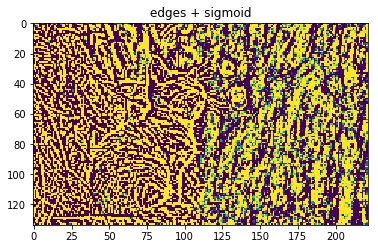

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.imshow(sigmoid(edges))
plt.title('edges + sigmoid')
plt.show()

In [12]:
# inspect somewhere in the middle of image (that's not black)
input_arr[112:114]

array([[ 175, -324,    6,   87,  -75,  134,  116,   73, -151, -130,   35,
         398,  -69, -442,    0,   28,   18, -240,  -48,  368,   58, -188,
         -31,  -32,  -60,  -11,   55,   -9,   46,   35,  -41,   12,   -6,
           0, -165,   67,  217,  -13,  -49,  -33,    8,   10,    3,   -1,
          -2,   -9,  -32,   -1,    8,   -6,   -5,   28,  -37,   -7,  -50,
          58,   -7,    3,   11,  -37,  -54,  -36,  -13,   84,    4,  -90,
         -59,  101,    1,  -19,   42,  -80,   28,   31,  -50,    9,  -51,
          42,  146, -103, -121,  -39,   54, -117, -131,  -71,   -4,   27,
          80,   69,   39,   39,  114,   74,   31,  -16,  119,  114,  145,
         -50, -110, -114,   18,  110,   43,  -96,  -27,   -3,  -15,   88,
          67,   14,   16,   -5,    9,    4,    0,    8,    7,  -10,   -3,
         -23,   -7,   -4,    4,    0,   12,    4,    3,   -2,  -10,    1,
           8,    8,    1,    2,    7,    4,  -11,   -5,    4,  -14,   -9,
         -12,   -4,  -17,   -8,    7, 

In [13]:
sigmoid(input_arr[112:114])

array([[1.00000000e+000, 1.94351485e-141, 9.97527377e-001,
        1.00000000e+000, 2.67863696e-033, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 2.63957030e-066,
        3.48110684e-057, 1.00000000e+000, 1.00000000e+000,
        1.08063928e-030, 1.10113102e-192, 5.00000000e-001,
        1.00000000e+000, 9.99999985e-001, 5.87928270e-105,
        1.42516408e-021, 1.00000000e+000, 1.00000000e+000,
        2.25235791e-082, 3.44247711e-014, 1.26641655e-014,
        8.75651076e-027, 1.67014218e-005, 1.00000000e+000,
        1.23394576e-004, 1.00000000e+000, 1.00000000e+000,
        1.56288219e-018, 9.99993856e-001, 2.47262316e-003,
        5.00000000e-001, 2.19487851e-072, 1.00000000e+000,
        1.00000000e+000, 2.26032430e-006, 5.24288566e-022,
        4.65888615e-015, 9.99664650e-001, 9.99954602e-001,
        9.52574127e-001, 2.68941421e-001, 1.19202922e-001,
        1.23394576e-004, 1.26641655e-014, 2.68941421e-001,
        9.99664650e-001, 2.47262316e-003, 6.69285092e-00

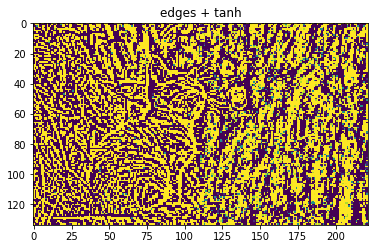

In [21]:
plt.imshow(np.tanh(input_arr))
plt.title('edges + tanh')
plt.show()

In [14]:
input_arr[112:114]

array([[ 175, -324,    6,   87,  -75,  134,  116,   73, -151, -130,   35,
         398,  -69, -442,    0,   28,   18, -240,  -48,  368,   58, -188,
         -31,  -32,  -60,  -11,   55,   -9,   46,   35,  -41,   12,   -6,
           0, -165,   67,  217,  -13,  -49,  -33,    8,   10,    3,   -1,
          -2,   -9,  -32,   -1,    8,   -6,   -5,   28,  -37,   -7,  -50,
          58,   -7,    3,   11,  -37,  -54,  -36,  -13,   84,    4,  -90,
         -59,  101,    1,  -19,   42,  -80,   28,   31,  -50,    9,  -51,
          42,  146, -103, -121,  -39,   54, -117, -131,  -71,   -4,   27,
          80,   69,   39,   39,  114,   74,   31,  -16,  119,  114,  145,
         -50, -110, -114,   18,  110,   43,  -96,  -27,   -3,  -15,   88,
          67,   14,   16,   -5,    9,    4,    0,    8,    7,  -10,   -3,
         -23,   -7,   -4,    4,    0,   12,    4,    3,   -2,  -10,    1,
           8,    8,    1,    2,    7,    4,  -11,   -5,    4,  -14,   -9,
         -12,   -4,  -17,   -8,    7, 

In [23]:
sigmoid(input_arr[112:114])

array([[1.00000000e+000, 1.94351485e-141, 9.97527377e-001,
        1.00000000e+000, 2.67863696e-033, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 2.63957030e-066,
        3.48110684e-057, 1.00000000e+000, 1.00000000e+000,
        1.08063928e-030, 1.10113102e-192, 5.00000000e-001,
        1.00000000e+000, 9.99999985e-001, 5.87928270e-105,
        1.42516408e-021, 1.00000000e+000, 1.00000000e+000,
        2.25235791e-082, 3.44247711e-014, 1.26641655e-014,
        8.75651076e-027, 1.67014218e-005, 1.00000000e+000,
        1.23394576e-004, 1.00000000e+000, 1.00000000e+000,
        1.56288219e-018, 9.99993856e-001, 2.47262316e-003,
        5.00000000e-001, 2.19487851e-072, 1.00000000e+000,
        1.00000000e+000, 2.26032430e-006, 5.24288566e-022,
        4.65888615e-015, 9.99664650e-001, 9.99954602e-001,
        9.52574127e-001, 2.68941421e-001, 1.19202922e-001,
        1.23394576e-004, 1.26641655e-014, 2.68941421e-001,
        9.99664650e-001, 2.47262316e-003, 6.69285092e-00

ReLU

$f(x) = max(0, x)$

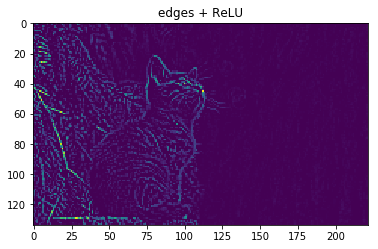

In [15]:
def relu(x):
    return np.maximum(x, 0)

plt.imshow(relu(input_arr))
plt.title('edges + ReLU')
plt.show()

In [25]:
input_arr[112:114]

array([[ 175, -324,    6,   87,  -75,  134,  116,   73, -151, -130,   35,
         398,  -69, -442,    0,   28,   18, -240,  -48,  368,   58, -188,
         -31,  -32,  -60,  -11,   55,   -9,   46,   35,  -41,   12,   -6,
           0, -165,   67,  217,  -13,  -49,  -33,    8,   10,    3,   -1,
          -2,   -9,  -32,   -1,    8,   -6,   -5,   28,  -37,   -7,  -50,
          58,   -7,    3,   11,  -37,  -54,  -36,  -13,   84,    4,  -90,
         -59,  101,    1,  -19,   42,  -80,   28,   31,  -50,    9,  -51,
          42,  146, -103, -121,  -39,   54, -117, -131,  -71,   -4,   27,
          80,   69,   39,   39,  114,   74,   31,  -16,  119,  114,  145,
         -50, -110, -114,   18,  110,   43,  -96,  -27,   -3,  -15,   88,
          67,   14,   16,   -5,    9,    4,    0,    8,    7,  -10,   -3,
         -23,   -7,   -4,    4,    0,   12,    4,    3,   -2,  -10,    1,
           8,    8,    1,    2,    7,    4,  -11,   -5,    4,  -14,   -9,
         -12,   -4,  -17,   -8,    7, 

In [16]:
relu(input_arr[112:114])

array([[175,   0,   6,  87,   0, 134, 116,  73,   0,   0,  35, 398,   0,
          0,   0,  28,  18,   0,   0, 368,  58,   0,   0,   0,   0,   0,
         55,   0,  46,  35,   0,  12,   0,   0,   0,  67, 217,   0,   0,
          0,   8,  10,   3,   0,   0,   0,   0,   0,   8,   0,   0,  28,
          0,   0,   0,  58,   0,   3,  11,   0,   0,   0,   0,  84,   4,
          0,   0, 101,   1,   0,  42,   0,  28,  31,   0,   9,   0,  42,
        146,   0,   0,   0,  54,   0,   0,   0,   0,  27,  80,  69,  39,
         39, 114,  74,  31,   0, 119, 114, 145,   0,   0,   0,  18, 110,
         43,   0,   0,   0,   0,  88,  67,  14,  16,   0,   9,   4,   0,
          8,   7,   0,   0,   0,   0,   0,   4,   0,  12,   4,   3,   0,
          0,   1,   8,   8,   1,   2,   7,   4,   0,   0,   4,   0,   0,
          0,   0,   0,   0,   7,   3,   7,   0,   0,   0,   1,   0,   3,
          0,   0,   3,   0,  10,  13,   3,   0,  13,   6,   0,   0,   0,
          0,   0,  10,   2,   0,   4,  10,   7,   0

Leaky ReLU

$f(x) = \begin{cases}
x & if\,x > 0 \\
0.01x & otherwise
\end{cases}$

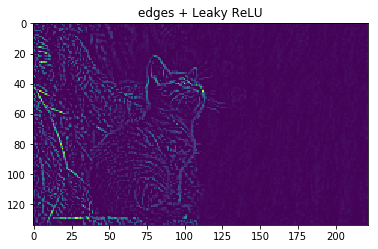

In [27]:
def leaky_relu(x):
    return np.where(x > 0, x, x * 0.01)

plt.imshow(leaky_relu(input_arr))
plt.title('edges + Leaky ReLU')
plt.show()

In [28]:
input_arr[112:114]

array([[ 175, -324,    6,   87,  -75,  134,  116,   73, -151, -130,   35,
         398,  -69, -442,    0,   28,   18, -240,  -48,  368,   58, -188,
         -31,  -32,  -60,  -11,   55,   -9,   46,   35,  -41,   12,   -6,
           0, -165,   67,  217,  -13,  -49,  -33,    8,   10,    3,   -1,
          -2,   -9,  -32,   -1,    8,   -6,   -5,   28,  -37,   -7,  -50,
          58,   -7,    3,   11,  -37,  -54,  -36,  -13,   84,    4,  -90,
         -59,  101,    1,  -19,   42,  -80,   28,   31,  -50,    9,  -51,
          42,  146, -103, -121,  -39,   54, -117, -131,  -71,   -4,   27,
          80,   69,   39,   39,  114,   74,   31,  -16,  119,  114,  145,
         -50, -110, -114,   18,  110,   43,  -96,  -27,   -3,  -15,   88,
          67,   14,   16,   -5,    9,    4,    0,    8,    7,  -10,   -3,
         -23,   -7,   -4,    4,    0,   12,    4,    3,   -2,  -10,    1,
           8,    8,    1,    2,    7,    4,  -11,   -5,    4,  -14,   -9,
         -12,   -4,  -17,   -8,    7, 

In [29]:
leaky_relu(input_arr[112:114])

array([[ 1.75e+02, -3.24e+00,  6.00e+00,  8.70e+01, -7.50e-01,  1.34e+02,
         1.16e+02,  7.30e+01, -1.51e+00, -1.30e+00,  3.50e+01,  3.98e+02,
        -6.90e-01, -4.42e+00,  0.00e+00,  2.80e+01,  1.80e+01, -2.40e+00,
        -4.80e-01,  3.68e+02,  5.80e+01, -1.88e+00, -3.10e-01, -3.20e-01,
        -6.00e-01, -1.10e-01,  5.50e+01, -9.00e-02,  4.60e+01,  3.50e+01,
        -4.10e-01,  1.20e+01, -6.00e-02,  0.00e+00, -1.65e+00,  6.70e+01,
         2.17e+02, -1.30e-01, -4.90e-01, -3.30e-01,  8.00e+00,  1.00e+01,
         3.00e+00, -1.00e-02, -2.00e-02, -9.00e-02, -3.20e-01, -1.00e-02,
         8.00e+00, -6.00e-02, -5.00e-02,  2.80e+01, -3.70e-01, -7.00e-02,
        -5.00e-01,  5.80e+01, -7.00e-02,  3.00e+00,  1.10e+01, -3.70e-01,
        -5.40e-01, -3.60e-01, -1.30e-01,  8.40e+01,  4.00e+00, -9.00e-01,
        -5.90e-01,  1.01e+02,  1.00e+00, -1.90e-01,  4.20e+01, -8.00e-01,
         2.80e+01,  3.10e+01, -5.00e-01,  9.00e+00, -5.10e-01,  4.20e+01,
         1.46e+02, -1.03e+00, -1.21e+0

## Pooling Layer

- Summarizes the activations
 - Take the maximum of a window size: Max pooling
 - Take the average of a window size: Average pooling

https://keras.io/layers/pooling/

## Pooling Layer

- Translation invariances:
  - Robust to shifts in locations of pixels within that window
- Downsampling:
  - Compressing and summarizing inputs into next layers
  - Pass the highest activation, or the average activations to the next layer

## Walkthrough - Pooling

Let's see what happens when we pass our convolved + activated image through various pooling functions.

### Setup
Install the skimage library in your conda environment:
```
conda install scikit-image
```

In [17]:
# https://stackoverflow.com/questions/42463172/how-to-perform-max-mean-pooling-on-a-2d-array-using-numpy
from skimage.measure import block_reduce

def max_pool(x, pool_size=(2, 2)):
    return block_reduce(x, pool_size, np.max)

def average_pool(x, pool_size=(2, 2)):
    return block_reduce(x, pool_size, np.mean)

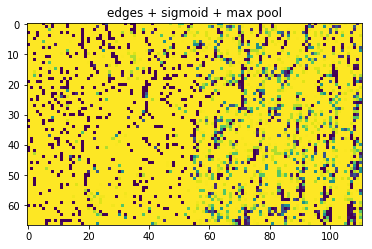

Original shape: (134, 222)
After activation: (134, 222)
After max pooling (2, 2): (67, 111)


In [18]:
plt.imshow(max_pool(sigmoid(edges)))
plt.title('edges + sigmoid + max pool')
plt.show()

print('Original shape:', edges.shape)
print('After activation:', sigmoid(edges).shape)

# (2, 2) will halve the size of the output
print('After max pooling (2, 2):', max_pool(sigmoid(edges)).shape)

### Max Pool

pool_size=(2, 2) means that it takes a 2x2 square and outputs 1 number.

The number is the maximum of the 4 numbers in that 2x2 square.

If the size is not divisible by pool_size, there are two choices:
- With zero padding: pad by zeros to make the size divisible. Then perform MaxPooling operation
- Without zero padding: behavior is not defined. Some libraries will drop these "edge" values.

In [19]:
edges[70:71] # somewhere in middle of image

array([[  27,    7, -106,  -22,   32,  -79,  168, -142, -132,   13,   62,
          -9, -218, -248,  396,  126, -202, -118,  -22, -157,  -76,  124,
         185,  209,  -40, -141, -167,   70,    8,    6,   20,   44,  185,
         148,  -30,   55,    9,  -30,  -58, -113,  -10, -105, -131,  245,
         277,  204,   98, -277,   26,  -38, -149,   60,  -14,  -62,  -45,
          29,   65,   80,  -11,   35,   22,  -49,  -38,    0,   -9,   23,
          62,  -20,  -44,  137,  175,    3,  -58,   37,   96,   56,  -39,
         -79,   36,    7,  -41,  -84,   41,   58,  108,  -14,   66,  102,
          19,  -10,    1, -158, -165,  -83, -170, -177, -164, -206,   -3,
         256,  -18,  -81,  112,   25,   19,  137, -142, -132, -111,  -46,
         -19,  -11,  -15,    1,    5,  -10,    0,   -2,    5,   -1,   -6,
           9,   11,   -8,   -3,   -1,    4,    0,    0,  -19,  -12,  -10,
          -3,    6,   -9,   -3,  -16,    2,   -3,  -10,   -5,    5,    6,
          14,   14,    8,    2,   -3, 

In [20]:
sigmoid(edges)[70:71] 

array([[1.00000000e+000, 9.99088949e-001, 9.22114642e-047,
        2.78946809e-010, 1.00000000e+000, 4.90609473e-035,
        1.00000000e+000, 2.13886596e-062, 4.71116580e-058,
        9.99997740e-001, 1.00000000e+000, 1.23394576e-004,
        2.10767161e-095, 1.97227962e-108, 1.00000000e+000,
        1.00000000e+000, 1.87290028e-088, 5.66566818e-052,
        2.78946809e-010, 6.54284062e-069, 9.85415469e-034,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        4.24835426e-018, 5.81404049e-062, 2.97044505e-073,
        1.00000000e+000, 9.99664650e-001, 9.97527377e-001,
        9.99999998e-001, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 9.35762297e-014, 1.00000000e+000,
        9.99876605e-001, 9.35762297e-014, 6.47023493e-026,
        8.40859712e-050, 4.53978687e-005, 2.50656748e-046,
        1.28062764e-057, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 5.01681993e-121,
        1.00000000e+000, 3.13913279e-017, 1.95039330e-06

In [21]:
max_pool(sigmoid(edges))[70:71]

array([], shape=(0, 111), dtype=float64)

In [22]:
print('Before maxpool', sigmoid(edges)[70:71].shape)
print('After maxpool (shape / 2)', max_pool(sigmoid(edges))[70:71].shape)

Before maxpool (1, 222)
After maxpool (shape / 2) (0, 111)


### Average Pool

pool_size=(2, 2) means that it takes a 2x2 square and outputs 1 number.

The number is the average of the 4 numbers in that 2x2 square.

If the size is not divisible by the pool size, there are two choices:
- With zero padding: pad by zeros to make the size divisible. Then perform MaxPooling operation
- Without zero padding: behavior is not defined. Some libraries will drop these "edge" values.

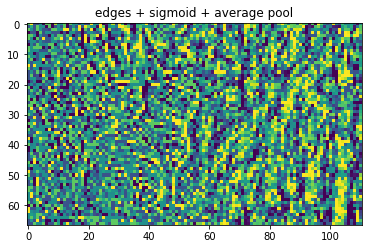

In [23]:
plt.imshow(average_pool(sigmoid(edges)))
plt.title('edges + sigmoid + average pool')
plt.show()

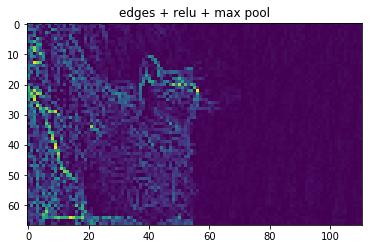

In [24]:
plt.imshow(max_pool(relu(edges)))
plt.title('edges + relu + max pool')
plt.show()

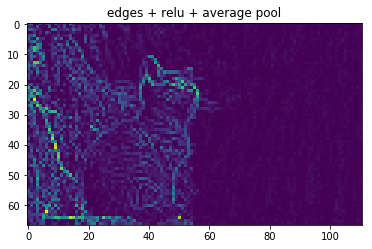

In [25]:
plt.imshow(average_pool(relu(edges)))
plt.title('edges + relu + average pool')
plt.show()

## Regularization Layers

These layers are common in Deep Convolutional Neural Networks:

- Dropout
- Batch Normalization

## Dropout

- Randomly setting some layer inputs to 0 during training to reduce overfitting.
- No-op during prediction

https://keras.io/layers/core/#dropout

## Dropout
![dropout](assets/image/dropout.png)

(image: http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

## Batch Normalization

- Avoid saturating non-linearities by normalizing the input to the next layer
- Normalizing is done per minibatch
- Speeds up training

https://keras.io/layers/normalization/#batchnormalization

## Batch Normalization - Training

![batch norm](assets/image/batchnorm.png)

(image: [Batch Normalization Paper](https://arxiv.org/abs/1502.03167))

## Batch Normalization - Prediction

- Minibatch mean and variance don't apply at prediction time
- Instead, "population" mean and variance is computed and stored from training
- Batch Norm layer will use the population mean and variance for prediction

## Architectures

- Image Classification
- Object Detection
- Instance Segmentation

https://github.com/keras-team/keras-applications

## ImageNet Large Scale Visual Recognition Challenge (ILSVRC)

- http://image-net.org/index
- 14 million crowdsourced, hand-annotated images
  - http://image-net.org/explore
  - http://image-net.org/download-bboxes
- Annual challenge, since 2010
  - Classifiy images into 1000 classes (including 90 dog breeds)
  - CNN breakthrough in 2012

## ImageNet Progress

![over the years](assets/image/pyconza17-deep-learning-for-computer-vision-60-638.jpg)

(image: [Alex Conway](https://www.slideshare.net/AlexConway2/pyconza17-deep-learning-for-computer-vision))

## Workshop: Image Classification CNNs

In this workshop, we'll explore a couple of Convolutional Neural Networks (CNNs) that are trained for ImageNet to perform accurate image classification.

We'll classify an image with the VGG16 model.

- Documentation: https://keras.io/applications/#vgg16

- Implementation: https://github.com/keras-team/keras-applications/blob/master/keras_applications/vgg16.py

Note that the weights are stored separately from the implementation.

In [ ]:
from keras.applications import VGG16

vgg16 = VGG16()
print(vgg16.summary())

### Download Image
1. Download an image from the web. It can be any well-known image format such as PNG or JPEG.
2. Update the `path` variable to point to your image

In [32]:
# update this path to your own image
path = 'assets/image/cat1.jpg'

### Pre-process image

1. Resize the crop the image into height: 224, width: 224
  - These dimensions are specified by the neural network as the default input size
2. Pre-process the image using `VGG16.preprocess_input`
3. Prepend an extra axis to match the input shape that the model expects

In [33]:
def resize_and_crop_image(image_path, width, height):
    """Resizes and crops an image to the desired size
    Args:
        image_path: path to the image
        width: image width
        height: image height
    Returns:
        the resulting image
    """
    from PIL import Image, ImageOps
    
    img = Image.open(image_path)
    img = ImageOps.fit(img, (width, height))
    return img

In [34]:
# Preprocess image input
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions

img = resize_and_crop_image(path, 224, 224)
x = img_to_array(img)
x = preprocess_input(x)
print('Original image shape:', x.shape)

# The model expect images in a batch, because it's trained that way
# Add an extra first axis
x = np.expand_dims(x, axis=0)
print('Expected input shape', x.shape)

Original image shape: (224, 224, 3)
Expected input shape (1, 224, 224, 3)


### Predict and decode predictions

1. Run the `VGG16.predict` method on the pre-processed image.
2. Use the `VGG16.decode_predictions` method to translate the raw predicted values into class labels. 

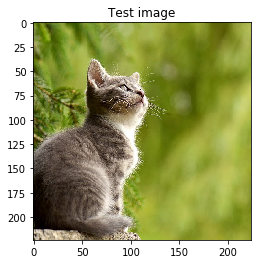

Raw predictions:
[[4.06351433e-08 4.14000425e-07 2.89054185e-07 2.41441512e-07
  7.94569317e-08 7.43839678e-07 6.25333385e-08 1.52177915e-06
  1.27014828e-05 3.48812937e-05 2.35925108e-06 7.95670701e-07
  5.21211587e-06 9.09857317e-06 2.18410223e-05 1.64340709e-05
  4.47523889e-05 2.39666813e-04 1.87449714e-05 3.01989462e-06
  4.97656001e-05 6.26688291e-07 4.22359562e-07 5.07072491e-06
  6.93049951e-05 5.40070687e-07 4.03083675e-07 7.27188194e-07
  2.59097590e-07 2.50034032e-06 5.85168982e-06 7.44305544e-06
  1.71816384e-06 1.53659499e-07 2.81993351e-07 1.35318078e-06
  3.86739521e-06 8.03817841e-07 3.33486014e-06 2.29790778e-04
  4.79971022e-05 1.17357531e-05 4.92753024e-05 4.82874248e-06
  4.41649136e-05 2.44500461e-06 2.00966533e-04 3.90429022e-06
  6.47496336e-06 2.16067110e-05 8.46587773e-06 5.94056519e-06
  2.98692407e-06 2.38370808e-06 2.02008482e-06 1.84145210e-05
  2.60562911e-06 9.20572404e-07 2.77610457e-06 3.87932487e-05
  5.81227368e-06 8.97684458e-07 1.78836012e-06 4.6780

In [35]:
y = vgg16.predict(x)

# display the image
plt.imshow(img, interpolation='nearest')
plt.title('Test image')
plt.show()

# display the predictions
print('Raw predictions:')
print(y)

print('Decoded predictions:')
print(decode_predictions(y, top=5))

## Exercise: Choose your own Image Classification CNN

1. Pick another CNN from this list: https://keras.io/applications/#available-models
 - Note: we are using models from `keras.applications`. The next workshop will cover using a keras model from a third-party source.
2. Repeat the steps above to:
 - Examine the model by getting its summary
 - Resize, crop, and preprocess the image using that model's `preprocess_input` method.
   - For best results, stick to the input size that is documented for the model
 - Get raw predictions
 - Decode the predictions using that model's `decode_predictions` method.

Can you find a model that performs better than `VGG16`?

In [ ]:
# Your code here
















## Workshop: Object Detection CNN

In this workshop, we'll explore an Object Detection CNN.

Object detection CNNs are not part of `keras.applications`, so we need to download the models separately, and then load it into keras.

We'll try this model: https://github.com/qqwweee/keras-yolo3.

This is a keras wrapper for the YOLO (you only look once) v3 model: https://pjreddie.com/darknet/yolo/

### Clone the keras-yolo3 repository

From a command window:
```
git clone https://github.com/qqwweee/keras-yolo3.git
```

### Download pre-trained YOLO v3 weights

Download https://pjreddie.com/media/files/yolov3.weights into your `keras-yolo3` folder.

Note: This file is 237MB, and may take a few minutes to download. While we are waiting, you can run the next cell (Examine YOLO v3 architecture).

### Examine YOLO v3 architecture

(This step can be done in parallel with the download.)

Open yolov3.cfg in the `keras-yolo3` folder in a text editor.

Scroll through the file, and you should recognize a few keywords. This config file defines the YOLO v3 architecture.

Here's how the hyperparameters are set for one of the many convolutional blocks:

```
[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky
```

The above describes a convolutional block with:
- depth 64
- kernel size 3
- stride 2
- padding "same"
- batch normalization
- leaky ReLU activation
- no pooling layer

These design choices are specific to this architecture.

### Convert into Keras model

#### Windows:

Launch an Anaconda Prompt:

```
activate mldds03
cd keras-yolo3
python convert.py yolov3.cfg yolov3.weights model_data\yolo.h5
```

#### MacOS / Ubuntu:

From a terminal window:

```
source activate mldds03
cd keras-yolo3
python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5
```

If successful, you should see this:

```
Parsing section yolo_2
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to
==================================================================================================
input_1 (InputLayer)            (None, None, None, 3 0
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 128         conv2d_1[0][0]
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, None, None, 3 0           batch_normalization_1[0][0]

...

__________________________________________________________________________________________________
batch_normalization_72 (BatchNo (None, None, None, 2 1024        conv2d_74[0][0]
__________________________________________________________________________________________________
leaky_re_lu_58 (LeakyReLU)      (None, None, None, 1 0           batch_normalization_58[0][0]
__________________________________________________________________________________________________
leaky_re_lu_65 (LeakyReLU)      (None, None, None, 5 0           batch_normalization_65[0][0]
__________________________________________________________________________________________________
leaky_re_lu_72 (LeakyReLU)      (None, None, None, 2 0           batch_normalization_72[0][0]
__________________________________________________________________________________________________
conv2d_59 (Conv2D)              (None, None, None, 2 261375      leaky_re_lu_58[0][0]
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, None, None, 2 130815      leaky_re_lu_65[0][0]
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, None, None, 2 65535       leaky_re_lu_72[0][0]
==================================================================================================
Total params: 62,001,757
Trainable params: 61,949,149
Non-trainable params: 52,608
__________________________________________________________________________________________________
None
Saved Keras model to model_data\yolo.h5
Read 62001757 of 62001757.0 from Darknet weights.

```

### A few interesting things:

- This is a big model (62 million parameters)
- The architect of this network decided to insert batch normalization **between** the convolutional layer and its activation
- Pooling is not in use at all

Next, let's use the model to perform object detection on images and videos.

### Image detection

```
python yolo.py
```

Enter an input image filename, and you should get something like this:

![memed](assets/image/yolo_v3_demo.png)

### Video detection

Video detection works by processing the image, one frame at a time.

#### Setup - OpenCV
To run video detection, you need to install OpenCV
```
conda install opencv
```

or
```
conda install -c conda-forge opencv
```

#### [Optional] Setup - openh264

To display detection boxes embedded in the video, download the libopenh264 codec:
1. Download https://github.com/cisco/openh264/releases
2. Extract the .bz2 (on Windows, use Winzip or WinRAR)
3. Copy openh264-1.6.0-win64msvc.dll to the `keras-yolo3` folder

This is just for display purposes. The model will still detect objects without this.

1. Download a video (in the smallest resolution you can find), for example:
https://pixabay.com/en/videos/street-it-s-raining-11067/

2. Run the video detector

```
python yolo_video.py video.mp4 output.mp4
```

Here's an example output for an example video:

![video](assets/image/yolo_v3_video.png)

```
Found 7 boxes for img
truck 0.50 (19, 282) (250, 538)
car 0.46 (320, 374) (393, 435)
car 0.57 (221, 355) (343, 435)
car 0.65 (386, 381) (488, 442)
car 0.74 (19, 282) (250, 538)
car 0.92 (554, 354) (833, 526)
person 0.72 (498, 354) (566, 464)
3.7216578782751952
(416, 416, 3)
Found 6 boxes for img
car 0.51 (322, 374) (391, 434)
car 0.69 (386, 382) (485, 442)
car 0.77 (219, 354) (340, 435)
car 0.90 (16, 282) (260, 538)
car 0.92 (553, 353) (835, 526)
person 0.75 (499, 353) (566, 465)
3.7170675099385093
(416, 416, 3)
Found 6 boxes for img
car 0.70 (322, 375) (393, 434)
car 0.78 (390, 382) (483, 443)
car 0.86 (14, 285) (265, 539)
car 0.91 (220, 354) (338, 440)
car 0.92 (553, 353) (834, 527)
person 0.91 (495, 349) (565, 466)
3.7226787045414973
(416, 416, 3)
Found 7 boxes for img
truck 0.58 (9, 290) (268, 536)
car 0.68 (18, 304) (286, 524)
car 0.71 (323, 375) (395, 434)
car 0.86 (390, 382) (483, 444)
car 0.90 (219, 355) (340, 440)
car 0.92 (554, 354) (834, 527)
person 0.87 (495, 349) (565, 464)
3.609754515084603
(416, 416, 3)
```

## Object Detection using YOLO

![yolo detection](assets/image/yolo-detection.png)

(image: https://pjreddie.com/media/files/papers/yolo.pdf)

In [ ]:
import os

keras_yolo3_path = 'D:/tmp/keras-yolo3/model_data' # update to your path

# trained weights
model_path = os.path.join(keras_yolo3_path, 'yolo.h5')

# anchors
anchors_path = os.path.join(keras_yolo3_path, 'yolo_anchors.txt')

# classes
classes_path = os.path.join(keras_yolo3_path, 'coco_classes.txt')

These are the pre-defined anchors, chosen to be representative of the ground truth detection boxes.

These are found using K-means clustering.

In [ ]:
with open(anchors_path, 'r') as f:
    print(f.read())

These are the classes of objects that the detector will recognize.

In [ ]:
with open(classes_path, 'r') as f:
    print(f.read())

Finally, this is the model architecture, as seen by keras.

In [ ]:
from keras.models import load_model

# This file is really huge, so may take some time to load
yolo_model = load_model(model_path, compile=False)
yolo_model.summary()

## Reading List

|Material|Read it for|URL
|--|--|--|
|Deep Learning - Chapter 9.2: Motivation (p 329-335)|3 motivations for convolution|http://www.deeplearningbook.org/contents/convnets.html|
|Deep Learning - Chapter 9.3: Motivation (p 335-339)|The idea behind pooling|http://www.deeplearningbook.org/contents/convnets.html|
|Bounding box object detectors: understanding YOLO, You Look Only Once|An overview of YOLO|https://christopher5106.github.io/object/detectors/2017/08/10/bounding-box-object-detectors-understanding-yolo.html|